In [26]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [27]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [28]:
dataset.shape

(14, 5)

In [29]:
agrupadoAparencia = dataset.groupby(['Aparencia']).size()
agrupadoAparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [30]:
agrupadojogar = dataset.groupby(['Jogar']).size()
agrupadojogar

Jogar
nao    5
sim    9
dtype: int64

In [31]:
#explorar dados numericos
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

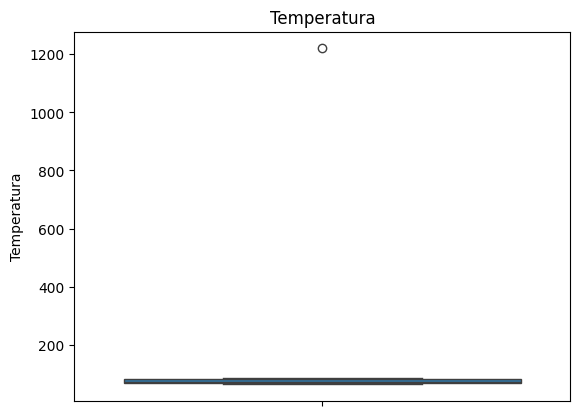

In [9]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

In [32]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [33]:
#contar valores NAN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [34]:
#tratamento de dados
#remover NAN e substituir pela mediana
medianaumidade = sts.median(dataset['Umidade'])
medianaumidade

85.5

In [35]:
#Substituir NAN pela mediana
dataset['Umidade'] = dataset['Umidade'].fillna(medianaumidade)


In [36]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [37]:
#verificar se ainda tem algum valor NAN na coluna 'Umidade'
dataset['Umidade'].isnull().sum()

0

In [38]:
#visualizar Umidade fora do padrao: 0-100
dataset.loc[(dataset['Umidade']<0) | (dataset['Umidade']>100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim


In [39]:
#substituir informacao fora do dominio pela mediana
dataset.loc[(dataset['Umidade']<0) | (dataset['Umidade']>100),'Umidade'] = medianaumidade

In [40]:
#verificar se ainda tem valores fora do dominio
dataset.loc[(dataset['Umidade']<0) | (dataset['Umidade']>100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [41]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,85.5,NaN,sim


In [42]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [43]:
#visualizar Temperatura fora do padrao: -130 ~ 130 f
dataset.loc[(dataset['Temperatura']<-130) | (dataset['Temperatura']>130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [44]:
#tratamento de dados campo Temperatura
medianaTemperatura = sts.median(dataset['Temperatura'])
medianaTemperatura

73.5

In [45]:
#substituir informacao fora do dominio pela mediana
dataset.loc[(dataset['Temperatura']<-130) | (dataset['Temperatura']>130),'Temperatura'] = medianaTemperatura


C:\Users\edson\AppData\Local\Temp\ipykernel_9344\2975112580.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Temperatura']<-130) | (dataset['Temperatura']>130),'Temperatura'] = medianaTemperatura


In [46]:
dataset.loc[(dataset['Temperatura']<-130) | dataset['Temperatura']>130]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [47]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,menos,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,NaN,sim


In [48]:
#padronizar de acordo com o dominio(sol, nublado, chuva) subistituir pela moda
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'

In [49]:
agrupadoAparencia = dataset.groupby(['Aparencia']).size()
agrupadoAparencia

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [50]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,NaN,sim
